somar 2016.1 + 2016.2 e 2017.1 + 2017.2

Filtrar apenas os pares de ligação comuns aos dois anos (possui valor != null em 2016 e 2017)



In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_excel("PesquisaOD_2016_2017.xlsx", sheet_name=['BD_1PNT2016','BD_2PNT2016','BD_1PNT2017','BD_2PNT2017'])
#Separando abas do arquivo
df2 = df ['BD_1PNT2016']
df3 = df['BD_2PNT2016']
df4 = df['BD_1PNT2017']
df5 = df['BD_2PNT2017']

# Concatenando os anos

DFmerged1 = pd.concat([df2, df3])
DFmerged2 = pd.concat([df4, df5])

DFmerged1 = DFmerged1.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil

DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['PDestino'] != 'Brasil'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['POrigem'] != 'Brasil'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['considerar_parOD?'] == '0'].index)
DFmerged1 = DFmerged1.drop(DFmerged1[DFmerged1['considerar_socio?'] == '0'].index)
DFmerged1 = DFmerged1.dropna(subset=['QtdPessoasVeic'])
DFmerged1['FreqQnt'] = DFmerged1['FreqQnt'].replace('>10', 11)

DFmerged2 = DFmerged2.loc[:, [ 'POrigem', 'MOrigem', 'UFOrigem','GeocodOrigem', 'PDestino', 'MDestino', 'UFDestino','GeocodDestino', 'FreqPeriodo','FreqQnt','Classe', 'QtdPessoasVeic','considerar_parOD?','considerar_socio?']] 

#Retirando origens e destinos que são diferentes do Brasil
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['PDestino'] != 'Brasil'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['POrigem'] != 'Brasil'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['FreqPeriodo'] == 'Informação não registrada'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['QtdPessoasVeic'] == 'Informação não registrada'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['considerar_parOD?'] == '0'].index)
DFmerged2 = DFmerged2.drop(DFmerged2[DFmerged2['considerar_socio?'] == '0'].index)
DFmerged2 = DFmerged2.dropna(subset=['QtdPessoasVeic'])
DFmerged2['FreqQnt'] = DFmerged2['FreqQnt'].replace('>10', 11)




In [2]:
#Calculando frequencias semanais
def multiplicarfrequencia(row):

    frequencia = row['FreqPeriodo']
    frequenciaQtd = row['FreqQnt']

    if frequencia == 'Semana':
        return  frequenciaQtd
    elif frequencia == 'Dia':
        return (frequenciaQtd * 7)
    elif frequencia == 'Mes':
        return (frequenciaQtd / 4)
    else: #ano ou eventualmente!
        return (frequenciaQtd / 52)

DFmerged1['FreqSem'] = DFmerged1.apply(multiplicarfrequencia, axis=1)
DFmerged2['FreqSem'] = DFmerged2.apply(multiplicarfrequencia, axis=1)

# Realizar o agrupamento e a soma
fatores = [ 'O1','O2','O3','P2']

# Filtrar os valores da coluna com base nos transportes
DFmerged1 = DFmerged1[DFmerged1['Classe'].isin(fatores)]
DFmerged2 = DFmerged2[DFmerged2['Classe'].isin(fatores)]

dfRes1 = DFmerged1.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino','FreqSem']] 
dfRes2 = DFmerged2.loc[:, ['MOrigem', 'UFOrigem','GeocodOrigem','MDestino', 'UFDestino','GeocodDestino','FreqSem']] 
dfRes1 = dfRes1.rename(columns={'FreqSem': 'FreqSem 2016'})
dfRes2 = dfRes2.rename(columns={'FreqSem': 'FreqSem 2017'})

display(dfRes1)
display(dfRes2)

,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqSem 2016
14,Frederico Westphalen,RS,4308508.0,Frederico Westphalen,RS,4308508.0,7.000000
39,Sorocaba,SP,3552205.0,Vacaria,RS,4322509.0,0.019231
44,Curitiba,PR,4106902.0,Papanduva,SC,4212205.0,0.019231
350,Laranjeiras do Sul,PR,4113304.0,Catanduvas,PR,4105003.0,0.384615
420,Paranaguá,PR,4118204.0,Cascavel,PR,4104808.0,1.000000
...,...,...,...,...,...,...,...
296836,Paraibano,MA,2107704.0,Colinas,MA,2103505.0,10.000000
296840,Araripina,PE,2601102.0,Colinas,MA,2103505.0,0.019231
296852,Colinas,MA,2103505.0,Colinas,MA,2103505.0,7.000000
296902,Colinas,MA,2103505.0,Barra do Corda,MA,2101608.0,0.019231


,MOrigem,UFOrigem,GeocodOrigem,MDestino,UFDestino,GeocodDestino,FreqSem 2017
33,São Domingos do Araguaia,PA,1507151.0,Marabá,PA,1504208.0,7.000000
44,Marabá,PA,1504208.0,Marabá,PA,1504208.0,14.000000
67,Anajatuba,MA,2100709.0,Marabá,PA,1504208.0,2.000000
169,Marabá,PA,1504208.0,São João do Araguaia,PA,1507508.0,0.019231
384,Marabá,PA,1504208.0,São Domingos do Araguaia,PA,1507151.0,7.000000
...,...,...,...,...,...,...,...
348192,São Paulo,SP,3550308.0,Vitória da Conquista,BA,2933307.0,0.038462
348193,São Paulo,SP,3550308.0,Belo Horizonte,MG,3106200.0,2.000000
348249,São Lourenço,MG,3163706.0,Belo Horizonte,MG,3106200.0,0.019231
348264,Oliveira,MG,3145604.0,Carmópolis de Minas,MG,3114501.0,7.000000


In [3]:
#GroupBy

agrupado1 = dfRes1.groupby(['GeocodOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem 2016':'sum'})
agrupado2 = dfRes2.groupby(['GeocodOrigem']).agg({'MOrigem':'first','UFOrigem' :'first','MDestino':'first','UFDestino' :'first','GeocodDestino':'first','FreqSem 2017':'sum'})

agrupado1 = agrupado1.reset_index()
agrupado2 = agrupado2.reset_index()

agrupado1['GeocodOrigem'] = agrupado1['GeocodOrigem'].astype(int)
agrupado1['GeocodDestino'] = agrupado1['GeocodDestino'].astype(int)
agrupado2['GeocodOrigem'] = agrupado2['GeocodOrigem'].astype(int)
agrupado2['GeocodDestino'] = agrupado2['GeocodDestino'].astype(int)

df_merged = pd.merge(agrupado1, agrupado2, on=['GeocodOrigem', 'GeocodDestino'])

#Mesclando UF e Mun Numa unica coluna
sep = '/'
df_merged['Cidade/EstadoOrigem'] = df_merged[['MOrigem_x', 'UFOrigem_x']].apply(lambda x: sep.join(x.astype(str)), axis=1)
df_merged['Cidade/EstadoDestino'] = df_merged[['MDestino_x', 'UFDestino_x']].apply(lambda x: sep.join(x.astype(str)), axis=1)
df_merged = df_merged.loc[:, ['GeocodOrigem', 'GeocodDestino','FreqSem 2016','FreqSem 2017','Cidade/EstadoOrigem', 'Cidade/EstadoDestino']] 
display(df_merged)


,GeocodOrigem,GeocodDestino,FreqSem 2016,FreqSem 2017,Cidade/EstadoOrigem,Cidade/EstadoDestino
0,2203909,2304400,9.019231,266.480769,Floriano/PI,Fortaleza/CE
1,2207702,5300108,0.076923,27.500000,Parnaíba/PI,Brasília/DF
2,2311306,2304400,1.057692,132.269231,Quixadá/CE,Fortaleza/CE
3,2512309,2604106,0.038462,3.038462,Princesa Isabel/PB,Caruaru/PE
4,2605152,2611101,19.038462,17.057692,Dormentes/PE,Petrolina/PE
5,2615706,2611606,0.153846,0.019231,Triunfo/PE,Recife/PE
6,2705002,3550308,0.076923,0.076923,Mata Grande/AL,São Paulo/SP
7,2706109,3550308,0.038462,0.019231,Ouro Branco/AL,São Paulo/SP
8,2903409,2927408,0.019231,1.000000,Belmonte/BA,Salvador/BA
9,2914703,2612505,14.115385,0.076923,Itaberaba/BA,Santa Cruz do Capibaribe/PE


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

dfx = pd.read_csv("ibge_dnit.csv")

#Somando os valores de 2016
soma=dfx['dnit_2016_1'].add(dfx['dnit_2016_2'], fill_value=0)
dfx['dnit-2016'] = soma

#Somando os valores de 2017
soma1=dfx['dnit_2017_1'].add(dfx['dnit_2017_2'], fill_value=0)
dfx['dnit-2017'] = soma1

df_final= dfx[dfx['dnit-2016'].notna()]
df_final= df_final[df_final['dnit-2017'].notna()]

display(df_final)


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_2017_1,dnit_pessoas_2017_1,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017
3,2300150,2304400,716.0,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,0.004791,5.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.004791
57,2110609,2111300,68.0,NaN,NaN,NaN,NaN,0.557534,8.0,NaN,...,0.004791,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.557534,0.004791
71,2307304,2933307,6.0,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,0.057534,1.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534
195,3170206,5201405,77.0,NaN,NaN,NaN,NaN,2.861618,25.0,NaN,...,1.000000,1.0,NaN,NaN,2.744511,11.0,NaN,NaN,2.861618,3.744511
198,2307304,2910800,8.0,NaN,NaN,NaN,NaN,0.230137,3.0,NaN,...,0.672603,5.0,NaN,NaN,0.014374,5.0,NaN,NaN,0.230137,0.686976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212680,5300108,5219712,NaN,NaN,NaN,NaN,NaN,0.115069,2.0,NaN,...,0.119860,3.0,NaN,NaN,NaN,NaN,NaN,NaN,0.115069,0.119860
212683,5300108,5220280,NaN,NaN,NaN,NaN,NaN,0.500000,2.0,NaN,...,NaN,NaN,NaN,NaN,0.250000,3.0,NaN,NaN,0.500000,0.250000
212684,5300108,5220405,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,0.057534,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534
212687,5300108,5221577,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,0.057534,2.0,NaN,NaN,0.004791,0.057534


In [5]:
# Calcular as diferenças entre as colunas
df_final['Diferenca'] = df_final['dnit-2017'] - df_final['dnit-2016']

# Calcular a maior diferença
maior_diferenca = df_final['Diferenca'].max()

# Calcular a menor diferença
menor_diferenca = df_final['Diferenca'].min()

# Calcular a média das diferenças
media_diferencas = df_final['Diferenca'].mean()

# Exibir os resultados
print("Maior diferença:", maior_diferenca)
print("Menor diferença:", menor_diferenca)
print("Média das diferenças:", media_diferencas)

Maior diferença: 966.4997522499999
Menor diferença: -1738.40598775
Média das diferenças: 0.7073889741122665


Correlação


In [6]:

print("DNIT 2016 - 2017")
print(df_final[["dnit-2016","dnit-2017"]].corr())
print()


DNIT 2016 - 2017
           dnit-2016  dnit-2017
dnit-2016   1.000000   0.061527
dnit-2017   0.061527   1.000000



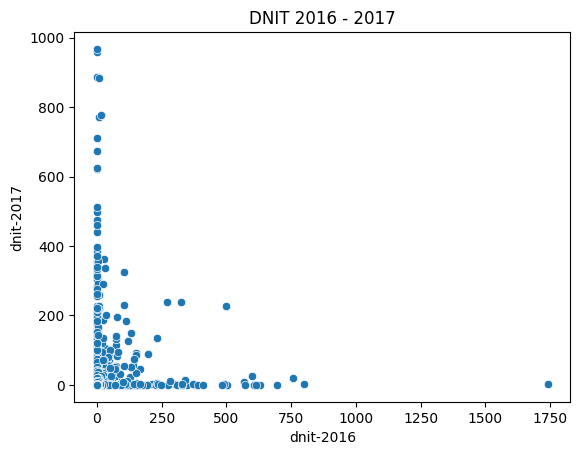

In [7]:
sns.scatterplot(data=df_final, x="dnit-2016", y="dnit-2017").set(title="DNIT 2016 - 2017")
plt.show()

*Soma*

Apresentar dado somente no IGBE

Somente no DNIT (localização geografica desses estados)

Os dois

Correlação dnit(2016+2017) e IBGE



,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017
3,2300150,2304400,716.0,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.004791,0.000000,0.009583
57,2110609,2111300,68.0,NaN,NaN,NaN,NaN,0.557534,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.557534,0.004791,-0.552743,0.562326
71,2307304,2933307,6.0,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534,0.052743,0.062326
195,3170206,5201405,77.0,NaN,NaN,NaN,NaN,2.861618,25.0,NaN,...,NaN,NaN,2.744511,11.0,NaN,NaN,2.861618,3.744511,0.882893,6.606129
198,2307304,2910800,8.0,NaN,NaN,NaN,NaN,0.230137,3.0,NaN,...,NaN,NaN,0.014374,5.0,NaN,NaN,0.230137,0.686976,0.456839,0.917114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212680,5300108,5219712,NaN,NaN,NaN,NaN,NaN,0.115069,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.115069,0.119860,0.004791,0.234928
212683,5300108,5220280,NaN,NaN,NaN,NaN,NaN,0.500000,2.0,NaN,...,NaN,NaN,0.250000,3.0,NaN,NaN,0.500000,0.250000,-0.250000,0.750000
212684,5300108,5220405,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534,0.052743,0.062326
212687,5300108,5221577,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,0.057534,2.0,NaN,NaN,0.004791,0.057534,0.052743,0.062326


IBGE - DNIT2016/2017
                   ibge  DNIT2016/2017
ibge           1.000000       0.358051
DNIT2016/2017  0.358051       1.000000



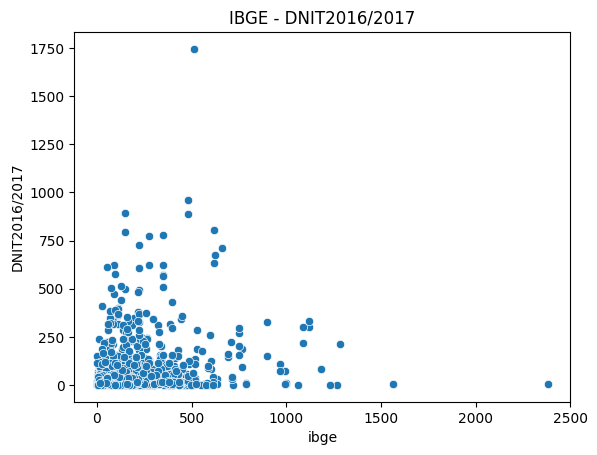

In [8]:
df_final['DNIT2016/2017'] = df_final['dnit-2017'] + df_final['dnit-2016']
display(df_final)

print("IBGE - DNIT2016/2017")
print(df_final[["ibge","DNIT2016/2017"]].corr())
print()

sns.scatterplot(data=df_final, x="ibge", y="DNIT2016/2017").set(title="IBGE - DNIT2016/2017")
plt.show()

In [9]:
#df que tem IBGE + DNIT
df_dnitibge= df_final[df_final['ibge'].notna()]
display(df_dnitibge)

#df que tem DNIT e não tem IGBE **
df_dnit= df_final[df_final['ibge'].isna()]
display(df_dnit)

,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017
3,2300150,2304400,716.0,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.004791,0.000000,0.009583
57,2110609,2111300,68.0,NaN,NaN,NaN,NaN,0.557534,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.557534,0.004791,-0.552743,0.562326
71,2307304,2933307,6.0,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534,0.052743,0.062326
195,3170206,5201405,77.0,NaN,NaN,NaN,NaN,2.861618,25.0,NaN,...,NaN,NaN,2.744511,11.0,NaN,NaN,2.861618,3.744511,0.882893,6.606129
198,2307304,2910800,8.0,NaN,NaN,NaN,NaN,0.230137,3.0,NaN,...,NaN,NaN,0.014374,5.0,NaN,NaN,0.230137,0.686976,0.456839,0.917114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130493,4203600,4202404,159.0,1.75,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.854788,10.0,NaN,NaN,1.750000,2.854788,1.104788,4.604788
130495,3148103,3104007,49.0,NaN,NaN,NaN,NaN,2.302045,6.0,NaN,...,NaN,NaN,3.730137,5.0,NaN,NaN,2.302045,7.493813,5.191768,9.795858
130500,2512754,2504009,104.0,NaN,NaN,NaN,NaN,0.615069,4.0,NaN,...,NaN,NaN,102.234214,220.0,NaN,NaN,0.615069,102.234214,101.619145,102.849283
130505,4215505,4213708,14.0,NaN,NaN,NaN,NaN,4.532841,23.0,NaN,...,NaN,NaN,4.099299,22.0,NaN,NaN,4.532841,4.099299,-0.433542,8.632140


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017
130528,1100015,1100304,NaN,0.250000,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.812326,8.0,NaN,NaN,0.250000,0.812326,0.562326,1.062326
130564,1100049,1100601,NaN,0.009583,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.865069,9.0,NaN,NaN,0.009583,1.865069,1.855486,1.874651
130597,1100056,3550308,NaN,0.115069,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.004791,0.0,NaN,NaN,0.115069,0.004791,-0.110277,0.119860
130633,1100098,3205002,NaN,0.115069,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.115069,0.0,NaN,NaN,0.115069,0.115069,0.000000,0.230137
130662,1100106,5103403,NaN,0.115069,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.004791,0.0,NaN,NaN,0.115069,0.004791,-0.110277,0.119860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212680,5300108,5219712,NaN,NaN,NaN,NaN,NaN,0.115069,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.115069,0.119860,0.004791,0.234928
212683,5300108,5220280,NaN,NaN,NaN,NaN,NaN,0.500000,2.0,NaN,...,NaN,NaN,0.250000,3.0,NaN,NaN,0.500000,0.250000,-0.250000,0.750000
212684,5300108,5220405,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.004791,0.057534,0.052743,0.062326
212687,5300108,5221577,NaN,NaN,NaN,NaN,NaN,0.004791,2.0,NaN,...,NaN,NaN,0.057534,2.0,NaN,NaN,0.004791,0.057534,0.052743,0.062326


Linhas que possuem DNIT 2016+2017 = NA e IBGE é diferente de NA

In [10]:
#Somando os valores de 2016 e 2017
soma3=dfx['dnit-2016'].add(dfx['dnit-2017'], fill_value=0)
dfx['DNIT2016/2017'] = soma3

dfigbe1= dfx[dfx['DNIT2016/2017'].isna()]
display(dfigbe1)
dfigbe2= dfigbe1[dfigbe1['ibge'].notna()]
display(dfigbe2)

,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_pessoas_2017_1,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017,DNIT2016/2017
1,1501204,1504604,68.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1502103,1504604,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2203107,2207405,6.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2301208,2310100,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2302107,2305100,526.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130523,2313609,2304236,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130524,3537206,3526209,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130525,4114104,3541406,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130526,4114807,4114104,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit_pessoas_2017_1,dnit_sel_2017_1,dnit_pessoas_sel_2017_1,dnit_2017_2,dnit_pessoas_2017_2,dnit_sel_2017_2,dnit_pessoas_sel_2017_2,dnit-2016,dnit-2017,DNIT2016/2017
1,1501204,1504604,68.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1502103,1504604,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2203107,2207405,6.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2301208,2310100,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2302107,2305100,526.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130523,2313609,2304236,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130524,3537206,3526209,7.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130525,4114104,3541406,14.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130526,4114807,4114104,21.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


somar 2016.1 + 2016.2 e 2017.1 + 2017.2

Filtrar apenas os pares de ligação comuns aos dois anos (possui valor != null em 2016 e 2017)

SeaBorn mapa - % de origem e destino - Origem e destino de dados diferentes


In [11]:
df_estado = pd.read_csv("estado.csv")
def adicionar_estado(df_estado, df_dnit):
    df_dnit["estado_origem"] = df_dnit["origem"].astype(str).str[:2]
    df_dnit["estado_origem"] = df_dnit["estado_origem"].astype(int)
    df_dnit["estado_destino"] = df_dnit["destino"].astype(str).str[:2]
    df_dnit["estado_destino"] = df_dnit["estado_destino"].astype(int)

    df_dnit = df_dnit.merge(df_estado[["cod_uf", "uf"]], left_on="estado_origem", right_on= "cod_uf")
    df_dnit.rename(columns={"uf": "uf_origem"}, inplace=True)
    df_dnit = df_dnit.merge(df_estado[["cod_uf", "uf"]], left_on="estado_destino", right_on= "cod_uf")
    df_dnit.rename(columns={"uf": "uf_destino"}, inplace=True)

    return df_dnit

#display(df_dnit)
#display(df_estado)
dfa=adicionar_estado(df_estado,df_dnit)

display(dfa)
df_diferentes = dfa.loc[dfa['estado_origem'] != dfa['estado_destino']]
display(df_diferentes)



C:\Users\lucas\AppData\Local\Temp\ipykernel_24892\3982117617.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dnit["estado_origem"] = df_dnit["origem"].astype(str).str[:2]
C:\Users\lucas\AppData\Local\Temp\ipykernel_24892\3982117617.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dnit["estado_origem"] = df_dnit["estado_origem"].astype(int)
C:\Users\lucas\AppData\Local\Temp\ipykernel_24892\3982117617.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017,estado_origem,estado_destino,cod_uf_x,uf_origem,cod_uf_y,uf_destino
0,1100015,1100304,NaN,0.250000,0.0,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.812326,0.562326,1.062326,11,11,11,RO,11,RO
1,1100049,1100601,NaN,0.009583,5.0,NaN,NaN,NaN,NaN,NaN,...,0.009583,1.865069,1.855486,1.874651,11,11,11,RO,11,RO
2,1100262,1100049,NaN,0.230137,0.0,NaN,NaN,0.250000,3.0,NaN,...,0.480137,0.009583,-0.470555,0.489720,11,11,11,RO,11,RO
3,1100304,1100148,NaN,0.062325,4.0,NaN,NaN,NaN,NaN,NaN,...,0.062325,0.014374,-0.047952,0.076699,11,11,11,RO,11,RO
4,1100023,1100106,NaN,NaN,NaN,NaN,NaN,4.406119,37.0,0.019165,...,4.406119,1.157492,-3.248627,5.563611,11,11,11,RO,11,RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,2927408,1600600,NaN,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,0.004791,0.057534,0.052743,0.062326,29,16,29,BA,16,AP
14461,3550308,1600303,NaN,NaN,NaN,NaN,NaN,0.119860,0.0,NaN,...,0.119860,0.234928,0.115069,0.354788,35,16,35,SP,16,AP
14462,4204202,1600303,NaN,NaN,NaN,NaN,NaN,0.230137,0.0,NaN,...,0.230137,0.067117,-0.163020,0.297254,42,16,42,SC,16,AP
14463,5208707,1600303,NaN,NaN,NaN,NaN,NaN,0.172603,0.0,NaN,...,0.172603,0.062326,-0.110277,0.234928,52,16,52,GO,16,AP


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017,estado_origem,estado_destino,cod_uf_x,uf_origem,cod_uf_y,uf_destino
130,1200013,1100023,NaN,NaN,NaN,NaN,NaN,0.057534,1.0,NaN,...,0.057534,0.004791,-0.052743,0.062326,12,11,12,AC,11,RO
131,1200013,1100205,NaN,NaN,NaN,NaN,NaN,0.500000,1.0,NaN,...,0.500000,1.121898,0.621898,1.621898,12,11,12,AC,11,RO
132,1200203,1100122,NaN,NaN,NaN,NaN,NaN,0.172603,0.0,NaN,...,0.172603,0.230137,0.057534,0.402740,12,11,12,AC,11,RO
133,1200203,1100304,NaN,NaN,NaN,NaN,NaN,0.230137,1.0,0.230137,...,0.230137,0.062325,-0.167812,0.292463,12,11,12,AC,11,RO
134,1200351,1100205,NaN,NaN,NaN,NaN,NaN,0.057534,0.0,NaN,...,0.057534,0.019165,-0.038369,0.076699,12,11,12,AC,11,RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,2927408,1600600,NaN,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,0.004791,0.057534,0.052743,0.062326,29,16,29,BA,16,AP
14461,3550308,1600303,NaN,NaN,NaN,NaN,NaN,0.119860,0.0,NaN,...,0.119860,0.234928,0.115069,0.354788,35,16,35,SP,16,AP
14462,4204202,1600303,NaN,NaN,NaN,NaN,NaN,0.230137,0.0,NaN,...,0.230137,0.067117,-0.163020,0.297254,42,16,42,SC,16,AP
14463,5208707,1600303,NaN,NaN,NaN,NaN,NaN,0.172603,0.0,NaN,...,0.172603,0.062326,-0.110277,0.234928,52,16,52,GO,16,AP


Origem
   uf_origem  percentage
10        MG   25.648116
25        SP   12.595921
8         GO    7.556170
23        SC    6.021431
4         BA    5.260975
17        PR    4.963705
18        RJ    4.756308
15        PE    4.417560
22        RS    4.320774
7         ES    4.051158
12        MT    3.802281
5         CE    2.786035
13        PA    2.315935
11        MS    1.914967
9         MA    1.901141
6         DF    1.776702
20        RO    1.382648
14        PB    1.030073
19        RN    0.871068
16        PI    0.808849
26        TO    0.753543
24        SE    0.456274
1         AL    0.318009
0         AC    0.165918
2         AM    0.089872
3         AP    0.027653
21        RR    0.006913


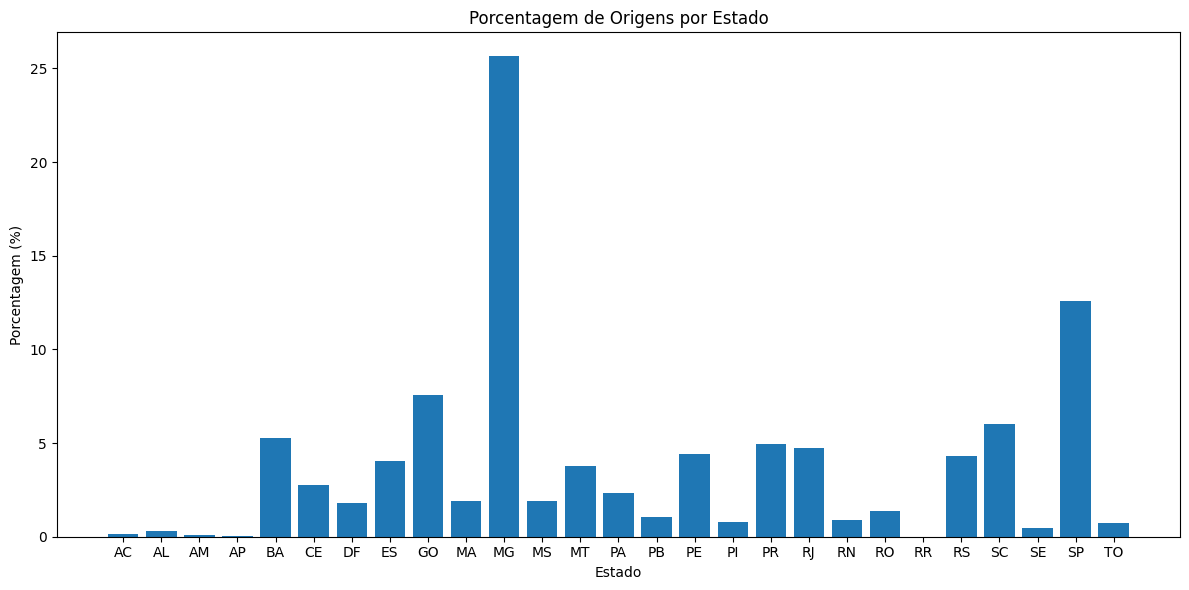

In [12]:
print("Origem")
df_perc = (dfa.groupby("uf_origem")["origem"].count()*100 / dfa.shape[0]).reset_index()
df_perc.rename(columns={"origem": "percentage"}, inplace=True)
print(df_perc.sort_values('percentage', ascending=False))

# Plotagem do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_perc['uf_origem'], df_perc['percentage'])

# Personalizar o gráfico
plt.xlabel('Estado')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de Origens por Estado')

# Exibir o gráfico
plt.tight_layout()
plt.show()



Destino
   uf_destino  percentage
10         MG   25.440719
25         SP   11.379191
8          GO    7.922572
23         SC    6.014518
4          BA    5.489112
18         RJ    5.274801
17         PR    4.141030
15         PE    4.134117
12         MT    3.940546
22         RS    3.843761
7          ES    3.698583
5          CE    2.931213
11         MS    2.398894
6          DF    2.364328
9          MA    2.357414
13         PA    2.309022
20         RO    1.590045
14         PB    1.071552
16         PI    1.016246
26         TO    0.801936
19         RN    0.670584
1          AL    0.421708
24         SE    0.394055
0          AC    0.221224
2          AM    0.131352
3          AP    0.034566
21         RR    0.006913


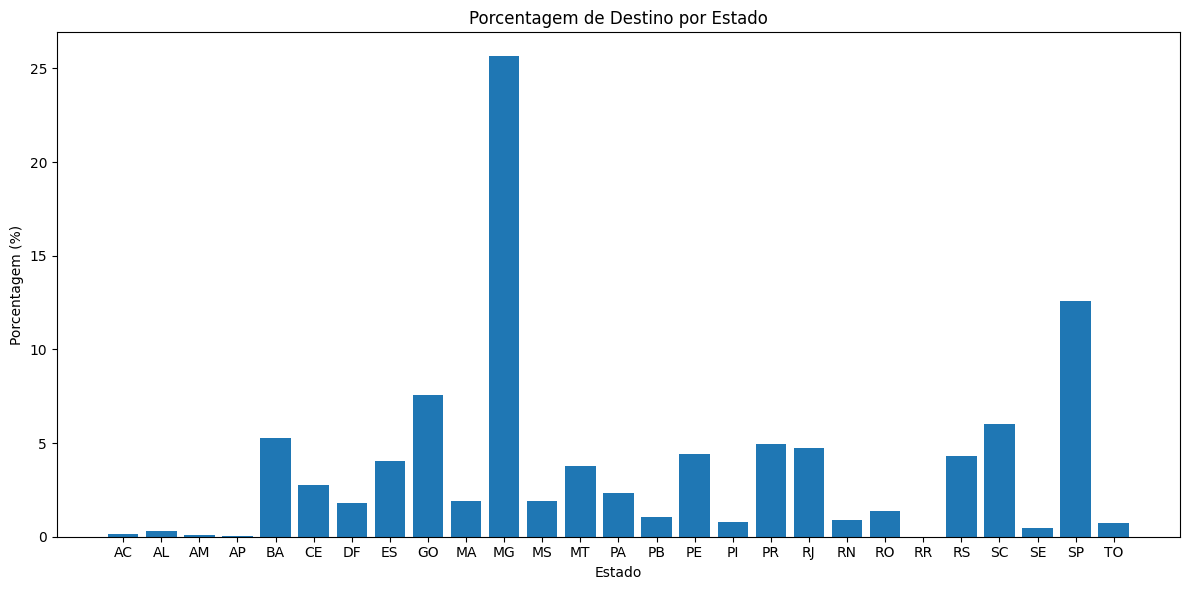

In [13]:
print("Destino")
df_perc1 = (dfa.groupby("uf_destino")["destino"].count()*100 / dfa.shape[0]).reset_index()
df_perc1.rename(columns={"destino": "percentage"}, inplace=True)
print(df_perc1.sort_values('percentage', ascending=False))
# Plotagem do gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(df_perc['uf_origem'], df_perc['percentage'])

# Personalizar o gráfico
plt.xlabel('Estado')
plt.ylabel('Porcentagem (%)')
plt.title('Porcentagem de Destino por Estado')

# Exibir o gráfico
plt.tight_layout()
plt.show()

entender se Sankey origem destino é interessante
analise de estados diferentes
tableau

In [14]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3], # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 2]
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

In [15]:
display(dfa)
# Fazendo o groupby e somando a coluna 'DNIT2016/2017'
estadosAgg = dfa.groupby(['uf_origem', 'uf_destino'])['DNIT2016/2017'].sum().reset_index()

print(estadosAgg)


,origem,destino,ibge,dnit_2016_1,dnit_pessoas_2016_1,dnit_sel_2016_1,dnit_pessoas_sel_2016_1,dnit_2016_2,dnit_pessoas_2016_2,dnit_sel_2016_2,...,dnit-2016,dnit-2017,Diferenca,DNIT2016/2017,estado_origem,estado_destino,cod_uf_x,uf_origem,cod_uf_y,uf_destino
0,1100015,1100304,NaN,0.250000,0.0,NaN,NaN,NaN,NaN,NaN,...,0.250000,0.812326,0.562326,1.062326,11,11,11,RO,11,RO
1,1100049,1100601,NaN,0.009583,5.0,NaN,NaN,NaN,NaN,NaN,...,0.009583,1.865069,1.855486,1.874651,11,11,11,RO,11,RO
2,1100262,1100049,NaN,0.230137,0.0,NaN,NaN,0.250000,3.0,NaN,...,0.480137,0.009583,-0.470555,0.489720,11,11,11,RO,11,RO
3,1100304,1100148,NaN,0.062325,4.0,NaN,NaN,NaN,NaN,NaN,...,0.062325,0.014374,-0.047952,0.076699,11,11,11,RO,11,RO
4,1100023,1100106,NaN,NaN,NaN,NaN,NaN,4.406119,37.0,0.019165,...,4.406119,1.157492,-3.248627,5.563611,11,11,11,RO,11,RO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14460,2927408,1600600,NaN,NaN,NaN,NaN,NaN,0.004791,0.0,NaN,...,0.004791,0.057534,0.052743,0.062326,29,16,29,BA,16,AP
14461,3550308,1600303,NaN,NaN,NaN,NaN,NaN,0.119860,0.0,NaN,...,0.119860,0.234928,0.115069,0.354788,35,16,35,SP,16,AP
14462,4204202,1600303,NaN,NaN,NaN,NaN,NaN,0.230137,0.0,NaN,...,0.230137,0.067117,-0.163020,0.297254,42,16,42,SC,16,AP
14463,5208707,1600303,NaN,NaN,NaN,NaN,NaN,0.172603,0.0,NaN,...,0.172603,0.062326,-0.110277,0.234928,52,16,52,GO,16,AP


    uf_origem uf_destino  DNIT2016/2017
0          AC         GO       0.196559
1          AC         MG       0.326001
2          AC         MT       0.768467
3          AC         PR       0.206142
4          AC         RJ       0.254093
..        ...        ...            ...
508        TO         RN       0.230137
509        TO         SC       0.359579
510        TO         SE       0.124651
511        TO         SP       3.602639
512        TO         TO       3.282182

[513 rows x 3 columns]


In [16]:
import pandas as pd
import plotly.graph_objects as go

# Suponha que você tenha um DataFrame chamado estadosAgg com as colunas uf_origem, uf_destino e DNIT2016/2017

# Criar uma lista com todos os estados presentes nas colunas uf_origem e uf_destino
all_states = list(set(estadosAgg['uf_origem']).union(set(estadosAgg['uf_destino'])))

# Criar um dicionário para mapear os estados para índices inteiros
state_indices = {state: idx for idx, state in enumerate(all_states)}

# Substituir os estados pelos índices no DataFrame estadosAgg
estadosAgg['source'] = estadosAgg['uf_origem'].map(state_indices)
estadosAgg['target'] = estadosAgg['uf_destino'].map(state_indices)

# Criar o gráfico Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_states,
    ),
    link=dict(
        source=estadosAgg['source'],
        target=estadosAgg['target'],
        value=estadosAgg['DNIT2016/2017'],
    )
)])

# Atualizar o layout do gráfico
fig.update_layout(title_text="Sankey Diagram: Fluxo entre Estados", font_size=10)
fig.show()

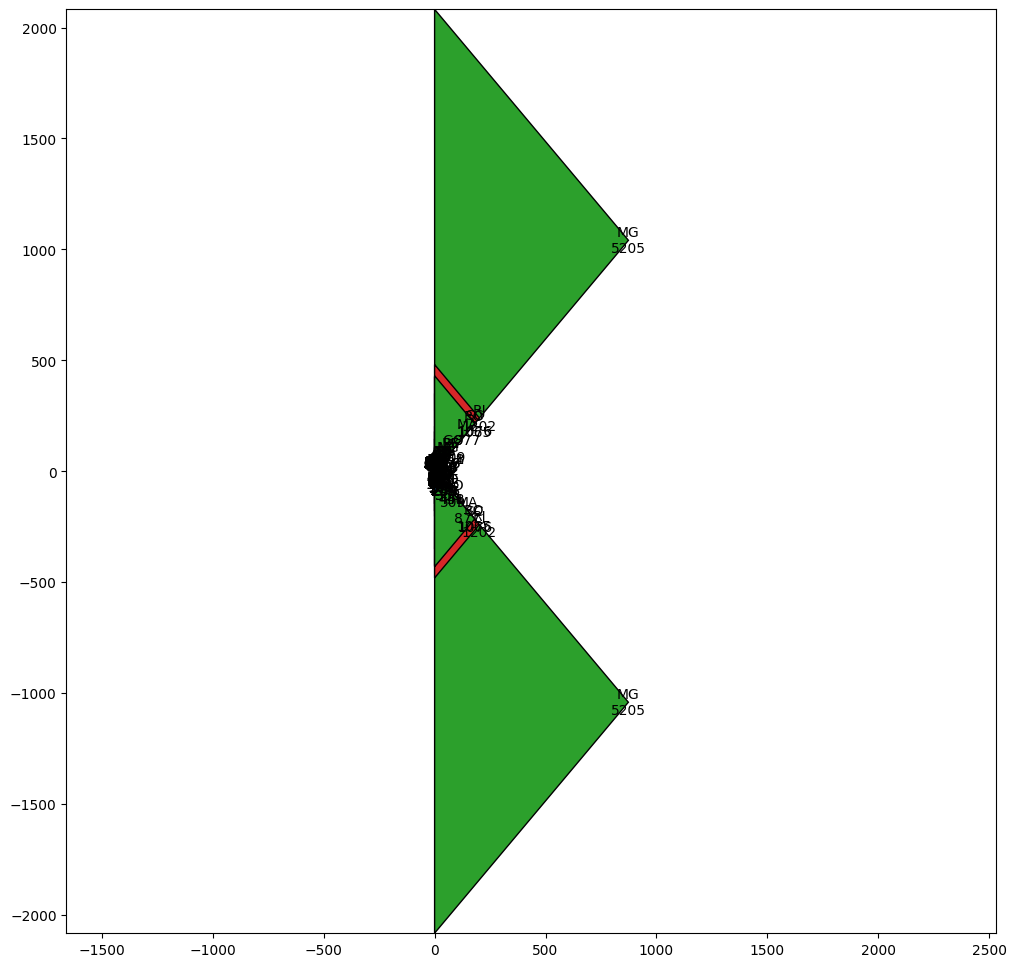

In [17]:
from matplotlib.sankey import Sankey

# Crie a figura e os eixos
fig, ax = plt.subplots(figsize=(12, 12))

# Crie o objeto Sankey com os eixos definidos
sankey = Sankey(ax=ax, scale=0.4, offset=0.2, format='%.0f', unit='')

# Acompanhe a posição dos fluxos
pos = {}

# Adicione os fluxos e rótulos ao objeto Sankey
for i in range(len(estadosAgg)):
    flows = [estadosAgg['DNIT2016/2017'][i]] * 2
    labels = [estadosAgg['uf_origem'][i], estadosAgg['uf_destino'][i]]
    # Verifique se a posição já está ocupada e ajuste o espaçamento
    prior = pos.get(labels[0], 0) + pos.get(labels[1], 0)
    pos[labels[0]] = prior + 1
    pos[labels[1]] = prior + 1
    sankey.add(flows=flows, labels=labels)

# Plote o gráfico de Sankey
sankey.finish()

# Exiba o gráfico
plt.show()